In [30]:
import pandas as pd
from ipyfilechooser import FileChooser
from IPython.display import display
# Create a file chooser
fc = FileChooser('data/')
display(fc)

# Button to load the selected file
def load_data(b):
    global df
    data_path = fc.selected
    if data_path:
        df = pd.read_csv(data_path, sep=',', usecols=['Setting', 'Timestamp', 'Channel_0', 'Channel_1', 'Channel_2', 'Channel_3'])
        display(df.head())

fc.register_callback(load_data)
# click on the output and use Alt+delete to clear and choose again

FileChooser(path='D:\code\uom_explore\data', filename='', title='', show_hidden=False, select_desc='Select', c…

,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,250,438808,17580,207,17624,16810
1,250,440925,17586,209,17626,16806
2,250,443043,17584,206,17626,16806
3,250,445164,17581,209,17624,16805
4,250,447286,17582,205,17624,16805


,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,250,513016,17563,207,17626,16806
1,250,515134,17566,206,17625,16806
2,250,517253,17577,210,17626,16806
3,250,519372,17582,206,17625,16809
4,250,521490,17581,206,17627,16807


,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,250,550123,17569,209,17627,16807
1,250,552238,17573,208,17627,16807
2,250,554361,17575,206,17627,16805
3,250,556480,17578,203,17627,16805
4,250,558602,17580,207,17627,16807


,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,250,141991,17570,207,17616,16800
1,250,144115,17574,209,17617,16804
2,250,146239,17582,208,17617,16802
3,250,148362,17582,208,17615,16803
4,250,150486,17584,207,17615,16803


,Setting,Timestamp,Channel_0,Channel_1,Channel_2,Channel_3
0,250,67794,17586,207,17611,16804
1,250,69916,17585,208,17610,16799
2,250,72040,17584,208,17611,16803
3,250,74166,17574,205,17611,16801
4,250,76290,17572,208,17612,16801


In [36]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the data by 'Setting'
grouped = df.groupby('Setting', as_index=False)  # Keep 'Setting' as a column, not as an index

# Normalize the timestamps in each group
def normalize_timestamps(group):
    group['Timestamp'] = group['Timestamp'] - group['Timestamp'].iloc[0]
    return group

# Apply the normalization function to each group
df_normalized = grouped.apply(normalize_timestamps).reset_index(drop=False)

# Group the normalized DataFrame again for plotting
grouped_normalized = df_normalized.groupby('Setting')


# use plotly to explore the data interactively
# Assume df_normalized is your DataFrame and is properly formatted

# Define the figure with subplots
fig = make_subplots(rows=1, cols=4, shared_yaxes=False)

# List of channels to plot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']

# # Using a color palette from Plotly for 10 categories
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
#           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot each channel in its respective subplot
for i, channel in enumerate(channels):
    for setting in df_normalized['Setting'].unique():
        # Filter the DataFrame for each setting
        df_filtered = df_normalized[df_normalized['Setting'] == setting]
        fig.add_trace(
            go.Scatter(
                x=df_filtered['Timestamp'],
                y=df_filtered[channel],
                mode='lines',
                name=f'Setting {setting}',
                # line=dict(color=colors[setting % len(colors)])  # Loop through colors cyclically
            ),
            row=1, col=i+1
        )

    # Set titles and axes labels
    fig.update_xaxes(title_text='Timestamp', row=1, col=i+1)
    fig.update_yaxes(title_text=channel, row=1, col=i+1)
    fig.update_layout(height=500, width=2000, title_text=f'{channel} vs. Timestamp')

# Improve layout and display figure
fig.update_layout(title_text="Channel Readings Over Time", showlegend=True)
fig.show()



C:\Users\gavin\AppData\Local\Temp\ipykernel_21676\295639441.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



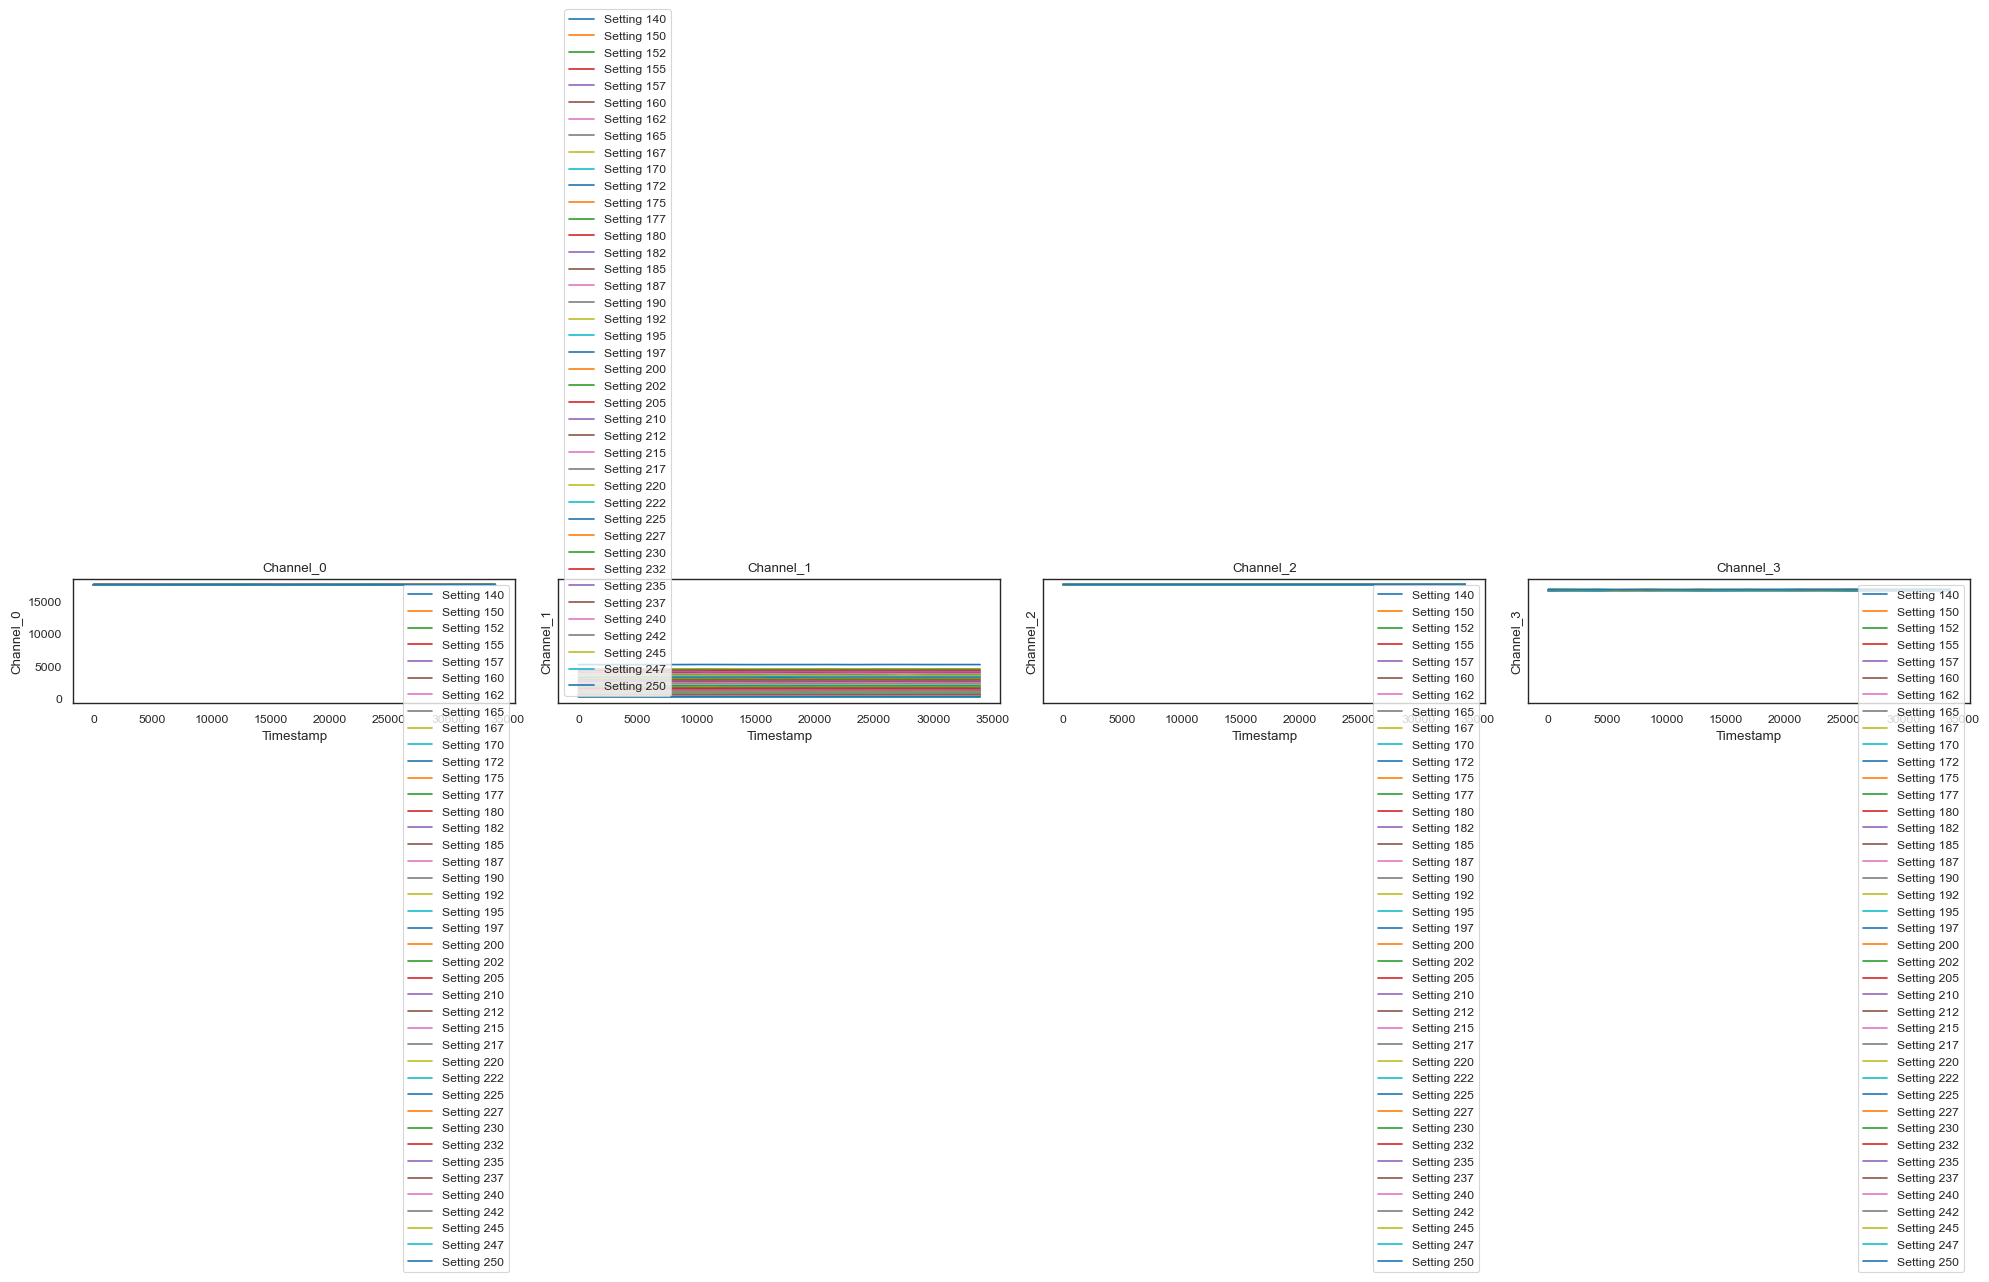

In [37]:
# Create a figure with subplots (one row, four columns)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Titles for each subplot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']
for i, channel in enumerate(channels):
    axs[i].set_title(channel)

# Plotting each channel in its subplot
for name, group in grouped_normalized:
    for i, channel in enumerate(channels):
        axs[i].plot(group['Timestamp'], group[channel], label=f'Setting {name}')
        axs[i].set_xlabel('Timestamp')
        axs[i].set_ylabel(channel)

# Add legends and adjust layout
for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()

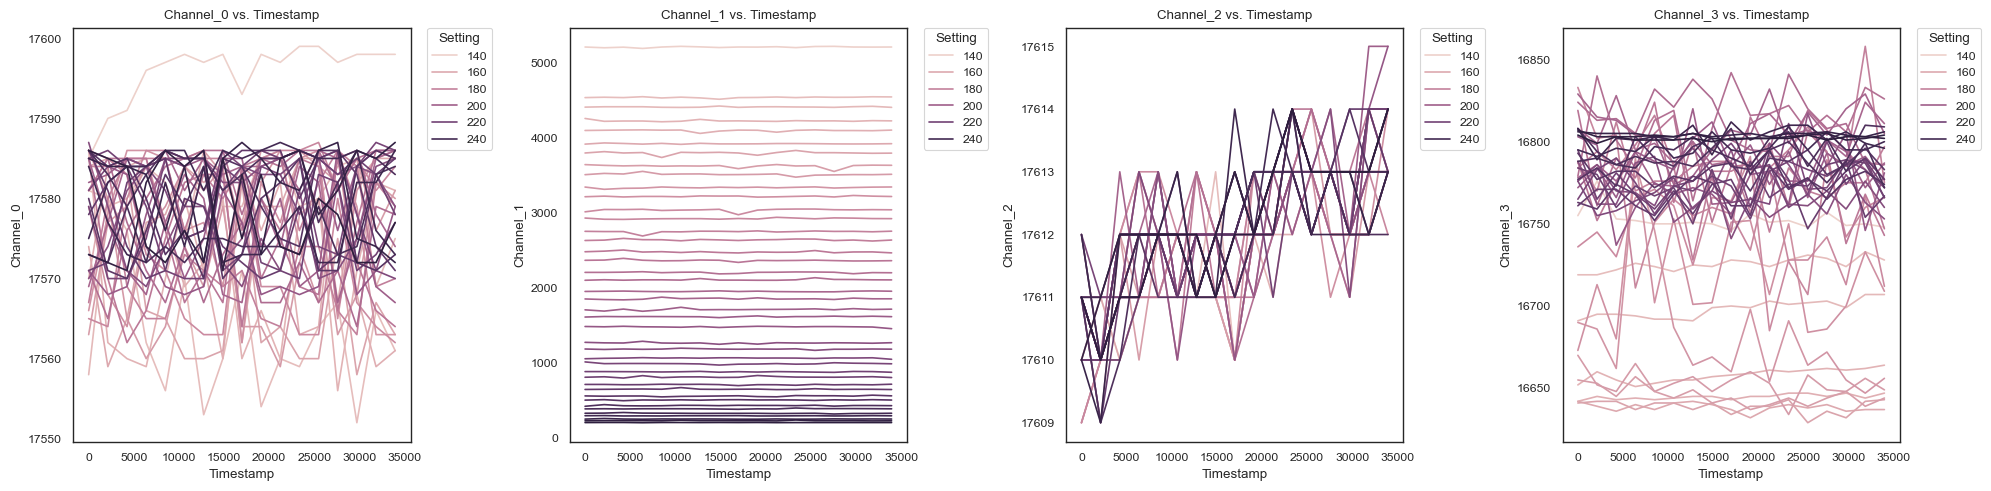

In [38]:
# plot in seaborn
import seaborn as sns


# Define a distinct color palette for 10 categories
palette = sns.color_palette("tab10", 10)

sns.set_theme(style='white', palette=palette, context="paper")
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=False)

# List of channels to plot
channels = ['Channel_0', 'Channel_1', 'Channel_2', 'Channel_3']

# Plot each channel
for i, channel in enumerate(channels):
    sns.lineplot(data=df_normalized, x='Timestamp', y=channel, hue='Setting', ax=axs[i])
    axs[i].set_title(f'{channel} vs. Timestamp')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(channel)
    # axs[i].legend(title='Setting', loc='upper right')
    axs[i].legend(title='Setting', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
# how many data points are there in each group?
grouped.size()


,Setting,size
0,140,17
1,150,17
2,152,17
3,155,17
4,157,17
5,160,17
6,162,17
7,165,17
8,167,17
9,170,17
